In [1]:
import numpy as np
%matplotlib notebook
import pylab as plt
import pickle as pickle

import networkx as nx

from NAQ_graphs import NAQ

#for automatic graph generation
import yaml as yaml
from graph_generator import generate_graph
import os as os

<IPython.core.display.Javascript object>


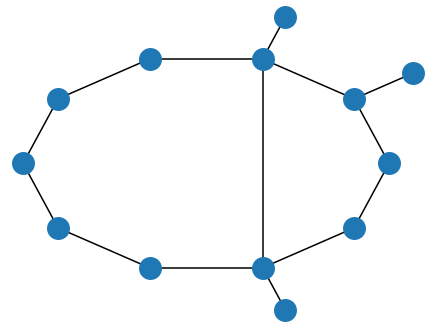

In [2]:
#create a small world network, using automatic generation, see generate_graph and graph_params for more

graph_tpe = 'SM'
params = yaml.load(open('graph_params.yaml','rb'))[graph_tpe]

G, pos  = generate_graph(tpe=graph_tpe, params = params)

if not os.path.isdir(graph_tpe):
    os.mkdir(graph_tpe)
os.chdir(graph_tpe)

#plot the graph
plt.figure(figsize=(4,3))
nx.draw(G, pos=pos, node_size=200)

In [3]:
#setup the main object
chi = np.array([ 1.j for i in range(len(G.edges))])

naq_u1 = NAQ(G, positions = pos, chi = chi, group = 'U1', open_graph = True)

naq_u1.n_processes_scan = 4 #number of CPU to use

#random update
naq_u1.update_chi([1.,1.])
#construct the graph laplacian
naq_u1.update_laplacian()

In [4]:
#do a complete fine scan for ploting
Ks = np.linspace(7,14, 100)
Alphas = np.linspace(0,.6, 50)

s, max_s = naq_u1.scan_k(Ks,Alphas) #compute a fine scan of the parameter space
pickle.dump([Ks, Alphas, s], open('scan.pkl', 'wb')) #save it for later

100%|██████████| 5000/5000 [00:06<00:00, 822.64it/s]


In [5]:
#find modes in some range of k and alpha=Im(k)

modes = naq_u1.find_modes(Ks, Alphas, s, max_s, params, th = 1e-3) #find many modes (start many searches in a grid)
pickle.dump(modes, open('modes.pkl', 'wb')) #save them for later

16 modes out of 27 attempts


<IPython.core.display.Javascript object>


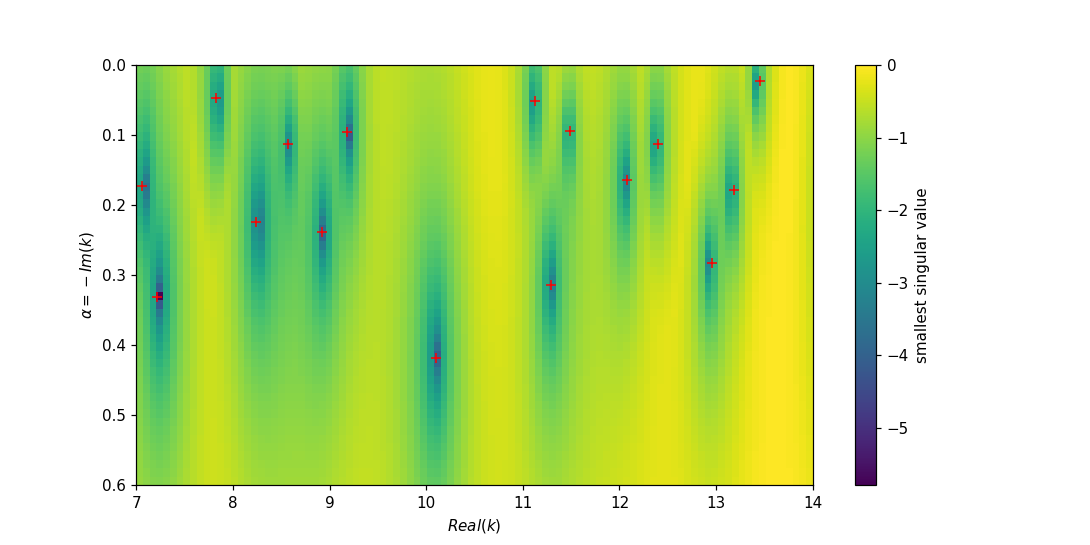

In [6]:
#plot the fine scan and the mode found
naq_u1.plot_scan(Ks,Alphas,s,modes)
plt.savefig('scan_modes.svg')

k= (13.451941709911647-0.022394735042611382j)


/home/arnaudon/anaconda3/lib/python3.6/site-packages/NAQ_graphs.py:567: ComplexWarning: Casting complex values to real discards the imaginary part
  edge_mean[ei] = np.conj(flux[2*ei:2*ei+2]).T.dot(z.dot(flux[2*ei:2*ei+2])) #BUG flux est du mauvais type je crois, type(flux[2*ei:2*ei+2]): <class 'scipy.sparse.csc.csc_matrix'>


<IPython.core.display.Javascript object>


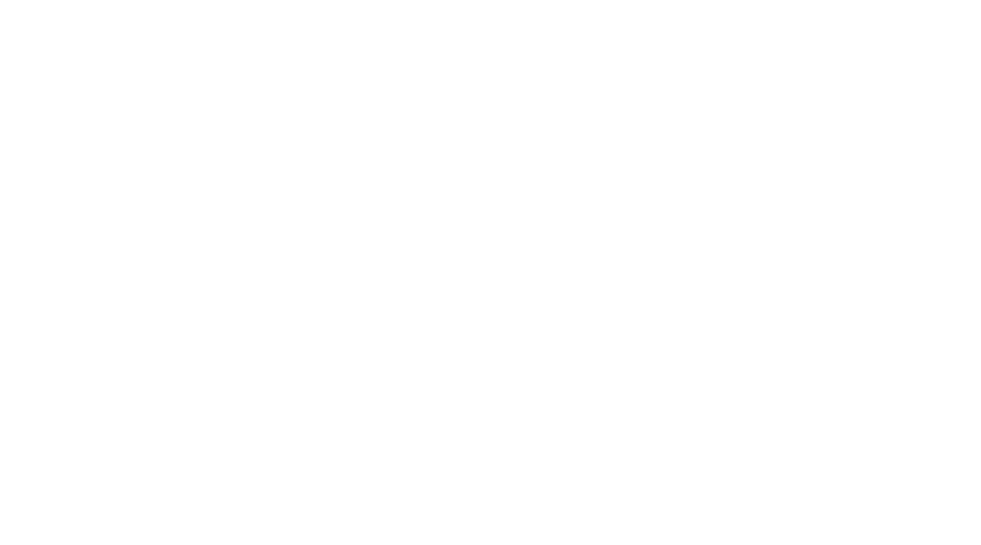

k= (7.820295671975474-0.047849934578988416j)


<IPython.core.display.Javascript object>


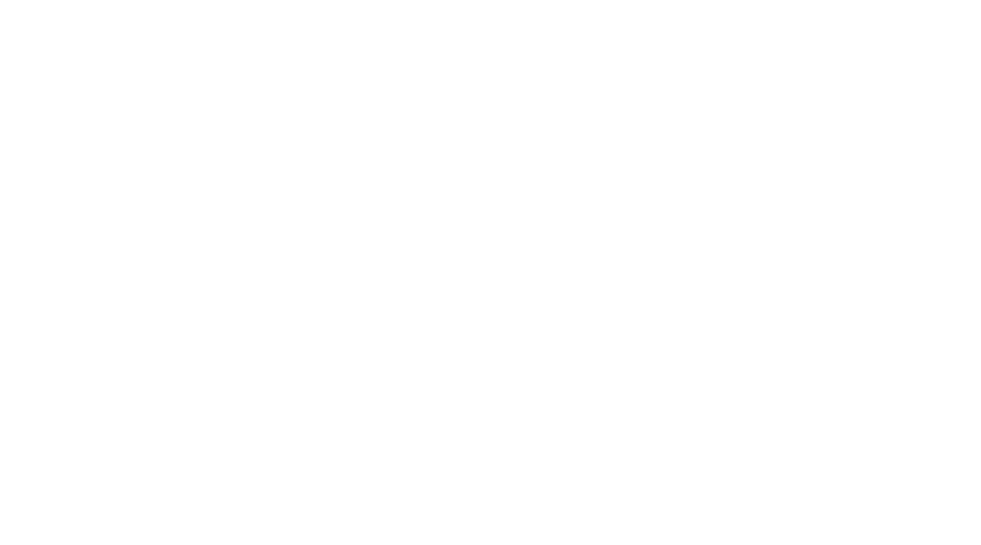

k= (11.126449364483959-0.0517455494508415j)


<IPython.core.display.Javascript object>


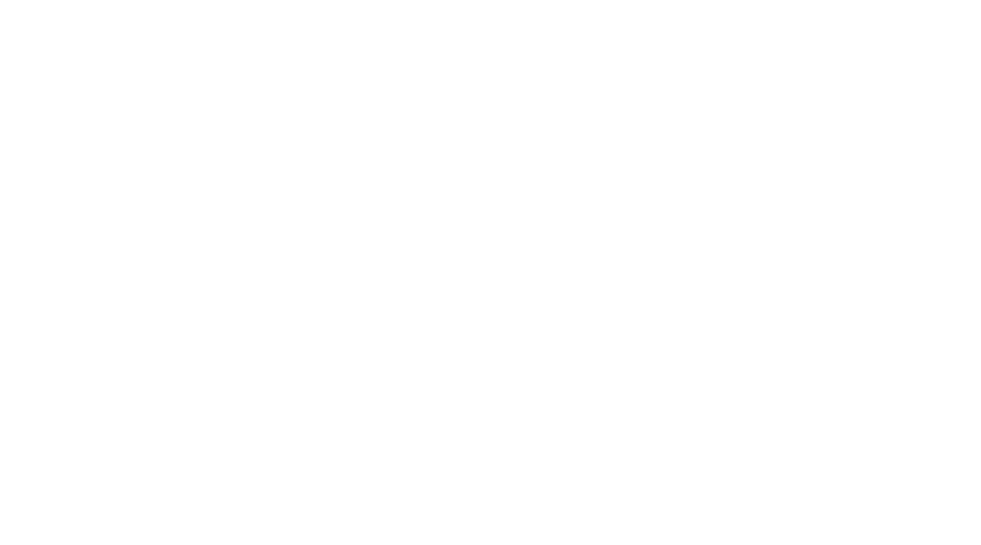

k= (14.237822998738352-0.1535821227470079j)


<IPython.core.display.Javascript object>


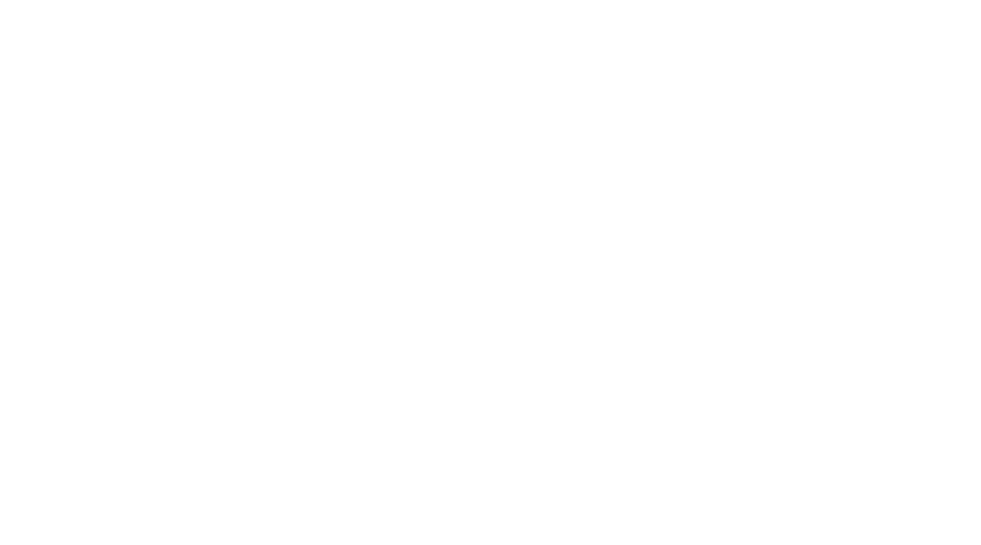

k= (12.072941935215203-0.1642518675638988j)


<IPython.core.display.Javascript object>


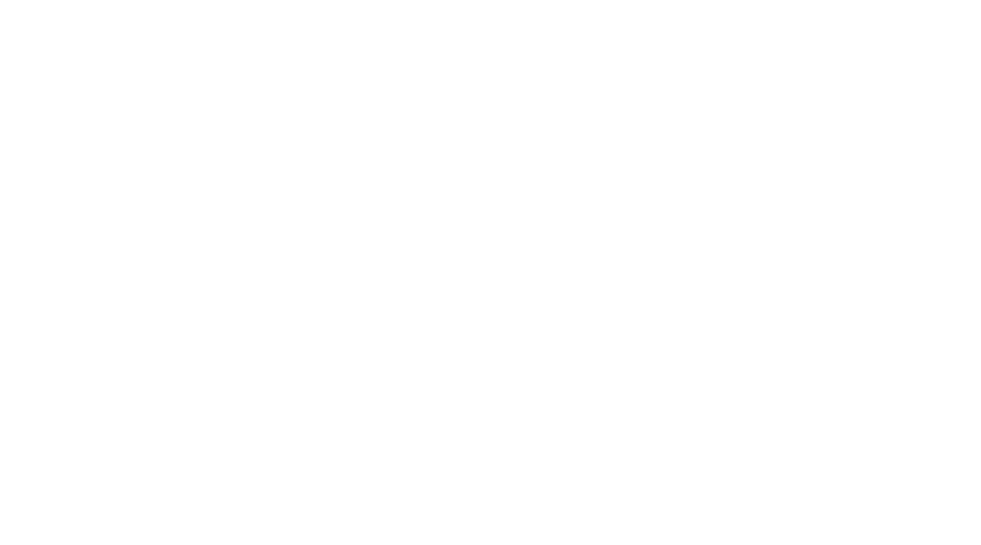

k= (7.053668895279399-0.1730477953377153j)


<IPython.core.display.Javascript object>


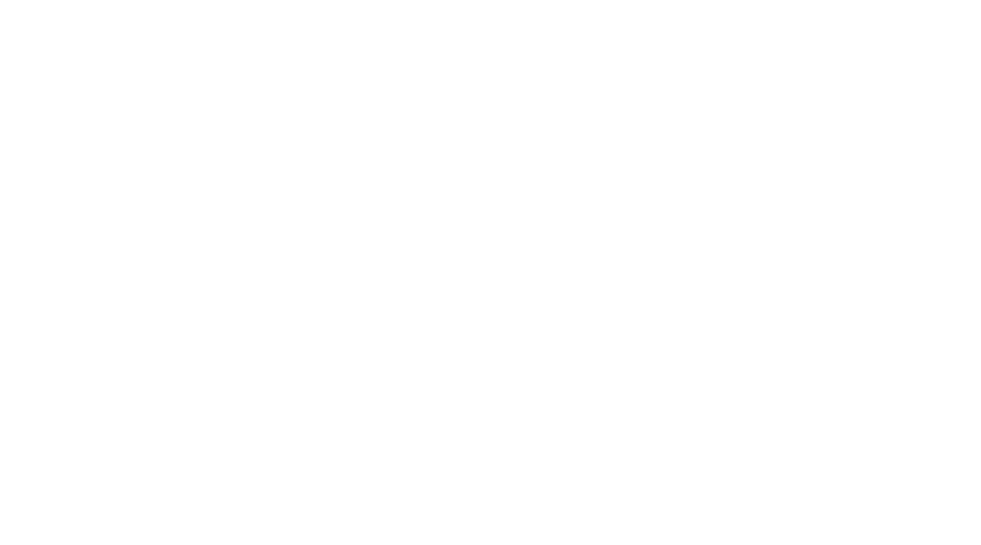

k= (13.182962570775134-0.17927793131983713j)


<IPython.core.display.Javascript object>


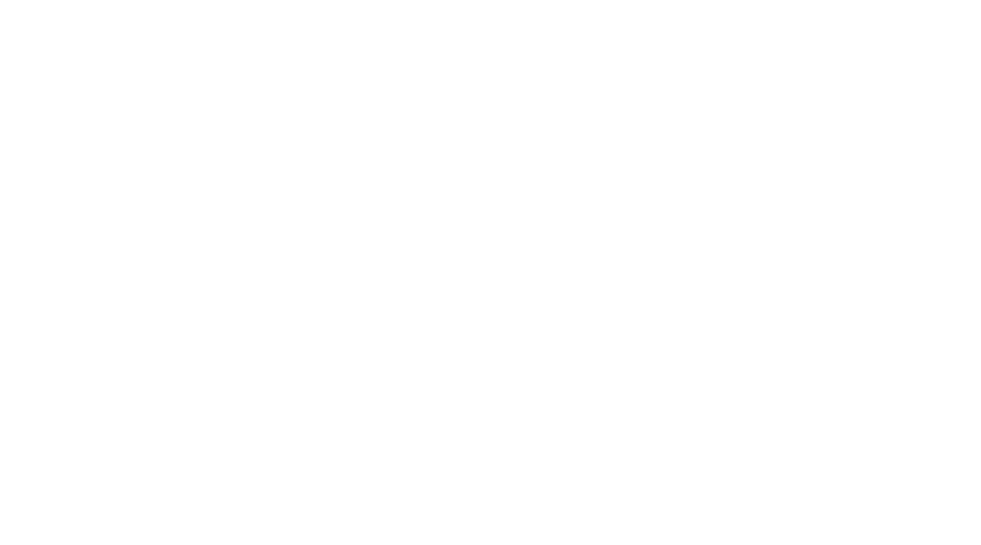

k= (8.242509026350318-0.22364613532892536j)


<IPython.core.display.Javascript object>


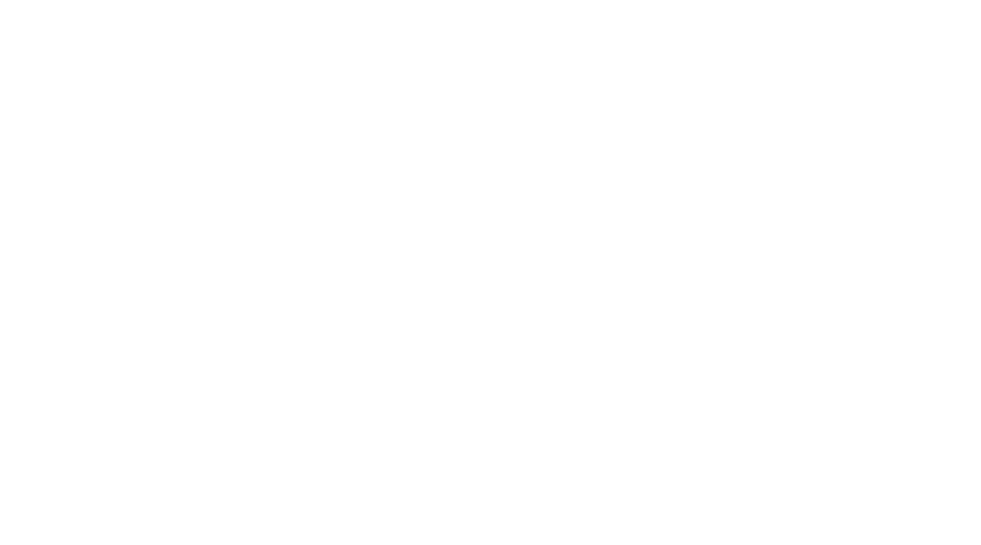

k= (8.921281408914524-0.2386798912204318j)


<IPython.core.display.Javascript object>


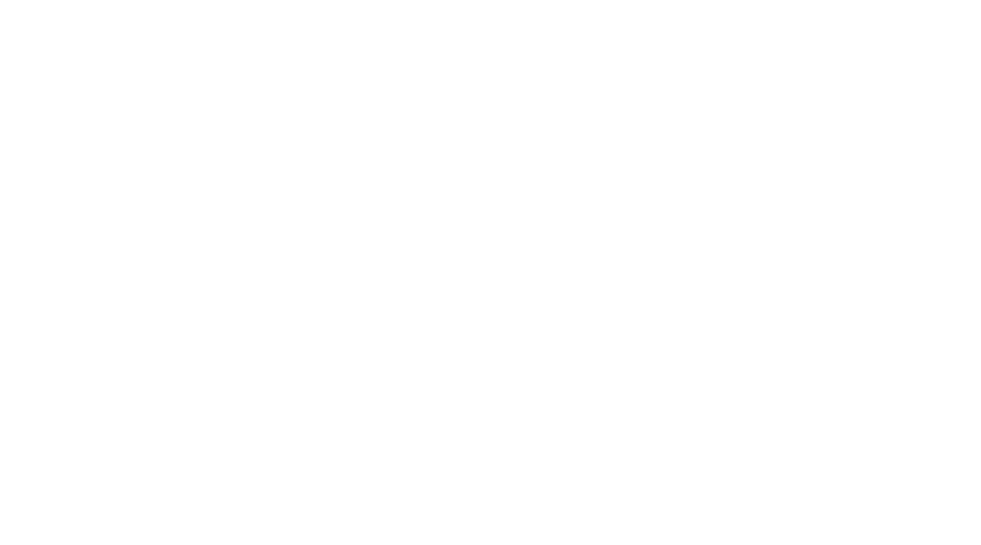

k= (12.956896289275852-0.28297148570452096j)


<IPython.core.display.Javascript object>


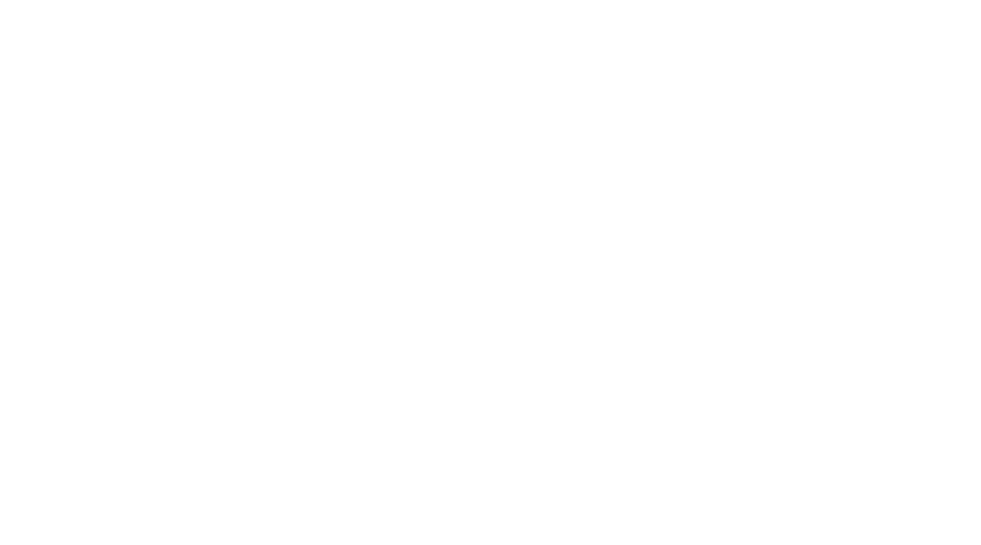

k= (11.293430750555446-0.3142099314154159j)


<IPython.core.display.Javascript object>


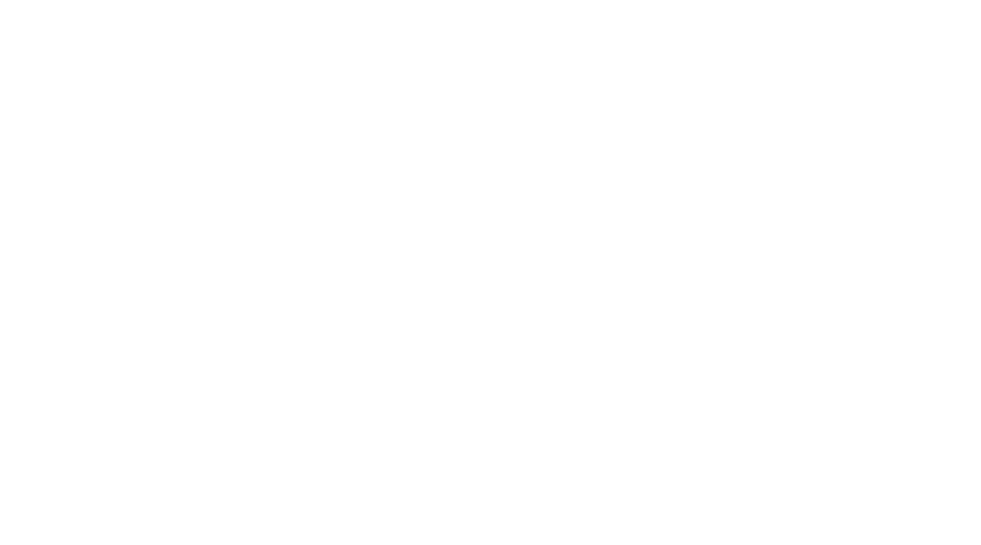

k= (7.210137825453408-0.33168220485069605j)


<IPython.core.display.Javascript object>


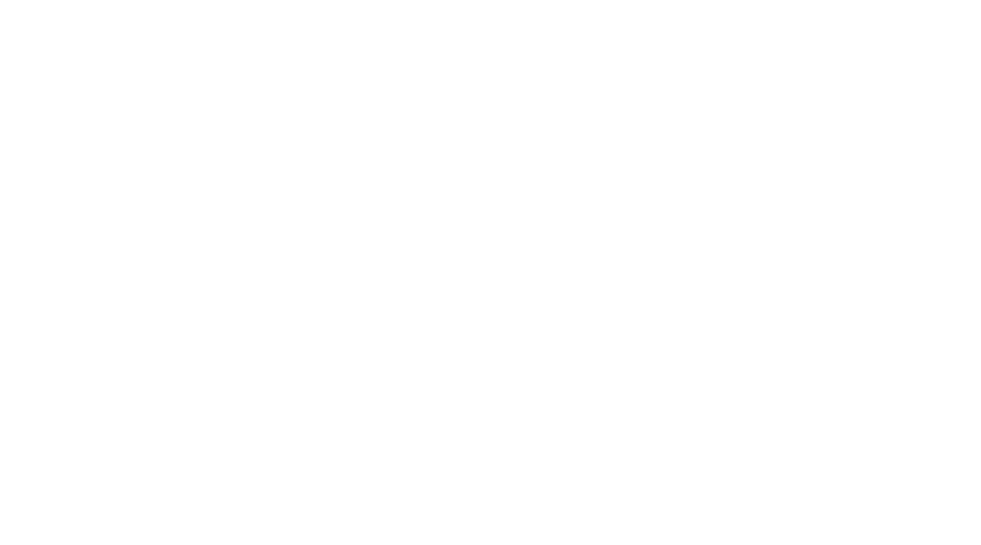

In [7]:
#for each mode, save a figure for it
if not os.path.isdir('modes'):
    os.mkdir('modes')

for m in range(len(modes)):
    print("k=", modes[m,0]-1j*modes[m,1])

    naq_u1.set_chi((modes[m,0]-1j*modes[m,1])*naq_u1.chi0)
    naq_u1.update_laplacian()
    phi = naq_u1.compute_solution()
    edge_color = naq_u1.compute_edge_mean_E2()

    plt.figure(figsize=(9,5))
    nodes = nx.draw_networkx_nodes(G,pos=pos, node_color = np.abs(phi)**2, cmap='plasma')
    edges = nx.draw_networkx_edges(G,pos=pos, edge_color = edge_color, edge_cmap=plt.get_cmap('plasma'), width=10)
    
    plt.colorbar(nodes, label=r'Node $|E_i|^2$')
    plt.colorbar(edges, label=r'Edges $\frac{1}{l_{ij}}\int_0^{l_{ij}}|E_{ij}(x)|^2 dx$')

    plt.title("k="+str(np.around(modes[m,0],2)-1j*np.around(modes[m,1],3)))
    plt.axis('off')
    plt.savefig('modes/mode_'+str(m)+'.svg')
    plt.close()